<a href="https://colab.research.google.com/github/Jessica-Emereuwa/GoMyCode-DataScience/blob/main/Unsupervised_Learning_Clustering_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""

Instructions

Import you data and perform basic data exploration phase
Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )
Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')
Perform partitional clustering using the K-means algorithm. Then, plot the clusters
Find the best k value and plot the clusters again.
Interpret the results

"""

# **IMPORTING DATA**

In [2]:
import pandas as pd
# Import the data
data = pd.read_csv("Credit_card_dataset.csv")
data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [3]:
# Dissplay General info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


# **CHECKING AND HANDLING MISSING DATA**

In [4]:
# display the data statistics
data.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [5]:
# Check for missing Values
data.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [6]:
#handle missing value by dropping the row with the missing value
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64

# **CHECK FOR DUPLICATES**

In [8]:
# check for duplicate values
data.duplicated().sum()

0

In [9]:
data.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,0.877350,1003.316936,1733.336511,4494.449450,978.959616
std,0.236798,2136.727848,2895.168146,3638.815725,2097.264344
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.800000,383.282850,1600.000000,0.000000
50%,1.000000,361.490000,857.062706,3000.000000,0.000000
75%,1.000000,1110.170000,1901.279320,6500.000000,1113.868654
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [10]:
!pip install ydata_profiling

# **DATA PROFILING**

In [11]:
#Ydata profiling
import ydata_profiling
profile = ydata_profiling.ProfileReport(data)
profile.to_file(output_file="Credit_card_dataset.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
profile.to_notebook_iframe()

In [13]:
# drop the CUST_ID column
data.drop('CUST_ID', axis=1, inplace=True)

# **CHECKING AND HANDLING OUTLIERS**

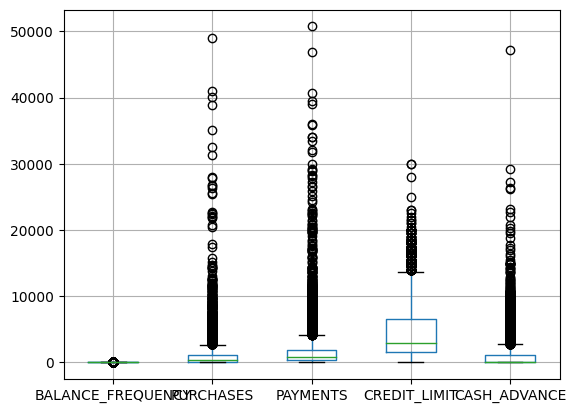

In [14]:
# box plot to veiw outliers for each columns
import matplotlib.pyplot as plt
data.boxplot()
plt.show()

In [15]:
import pandas as pd
import numpy as np
from scipy import stats

# Columns to check for outliers
columns_to_check = ['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'CASH_ADVANCE']

# Calculate the Z-scores for the specified columns
z_scores = np.abs(stats.zscore(data[columns_to_check]))

# Filter out rows with Z-score > 3 in any of the specified columns
df_filtered = data[(z_scores < 3).all(axis=1)]

print("Original DataFrame:")
print(data)
print("\nDataFrame after removing outliers in specified columns:")
print(df_filtered)


Original DataFrame:
      BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  CASH_ADVANCE
0              0.818182      95.40   201.802084        1000.0      0.000000
1              0.909091       0.00  4103.032597        7000.0   6442.945483
2              1.000000     773.17   622.066742        7500.0      0.000000
3              0.636364    1499.00     0.000000        7500.0    205.788017
4              1.000000      16.00   678.334763        1200.0      0.000000
...                 ...        ...          ...           ...           ...
8945           1.000000     291.12   325.594462        1000.0      0.000000
8946           1.000000     300.00   275.861322        1000.0      0.000000
8947           0.833333     144.40    81.270775        1000.0      0.000000
8948           0.833333       0.00    52.549959         500.0     36.558778
8949           0.666667    1093.25    63.165404        1200.0    127.040008

[8949 rows x 5 columns]

DataFrame after removing outliers in speci

# **HIERARCHICAL CLUSTERING**

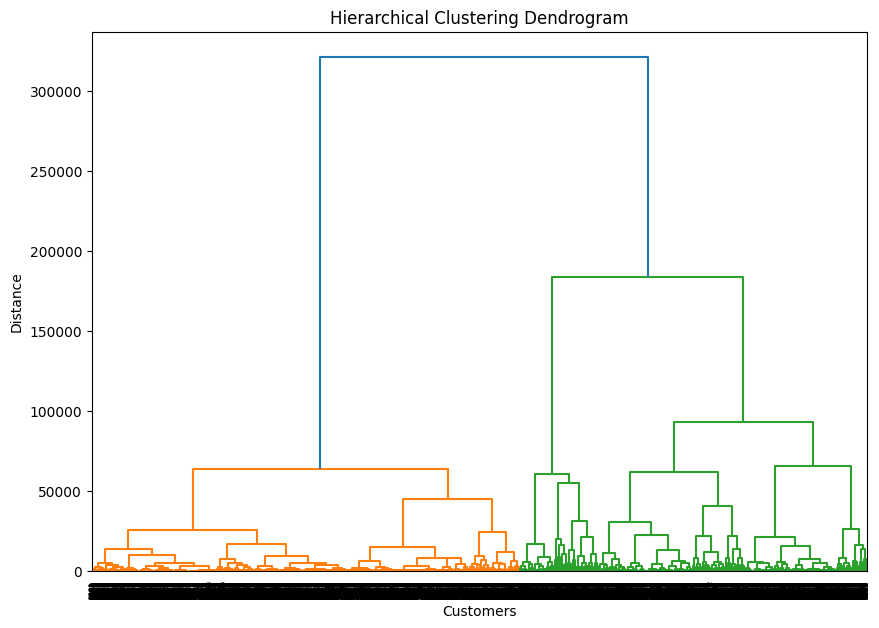

In [16]:
# Perform hierarchical clustering to identify the inherent groupings within your data.
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Select features for clustering
features = df_filtered[['PURCHASES', 'CREDIT_LIMIT']]

# Perform hierarchical clustering
linked = linkage(features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()


# **partitional clustering using the K-means algorithm**

In [17]:
#Perform partitional clustering using the K-means algorithm. Then, plot the clusters
from sklearn.cluster import KMeans
# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_filtered[['PURCHASES', 'CREDIT_LIMIT']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [18]:
df_filtered['kmeans_3'] = kmeans.labels_
df_filtered

<ipython-input-18-a8da13cd7b7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['kmeans_3'] = kmeans.labels_


,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,kmeans_3
0,0.818182,95.40,201.802084,1000.0,0.000000,0
1,0.909091,0.00,4103.032597,7000.0,6442.945483,1
2,1.000000,773.17,622.066742,7500.0,0.000000,1
3,0.636364,1499.00,0.000000,7500.0,205.788017,1
4,1.000000,16.00,678.334763,1200.0,0.000000,0
...,...,...,...,...,...,...
8945,1.000000,291.12,325.594462,1000.0,0.000000,0
8946,1.000000,300.00,275.861322,1000.0,0.000000,0
8947,0.833333,144.40,81.270775,1000.0,0.000000,0
8948,0.833333,0.00,52.549959,500.0,36.558778,0


# **ploting the clusters**

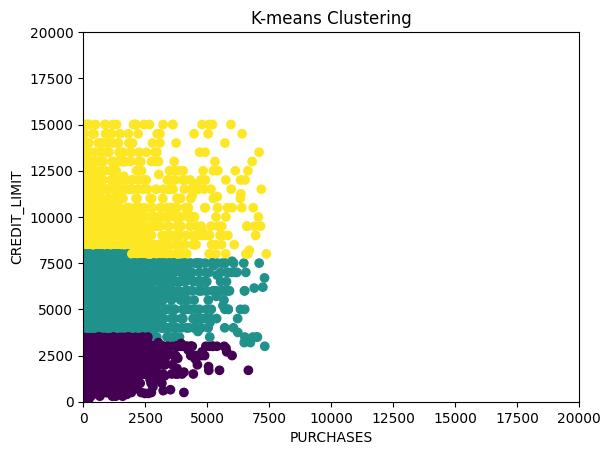

In [19]:
#ploting the clusters
plt.scatter(x= df_filtered['PURCHASES'], y= df_filtered['CREDIT_LIMIT'], c=df_filtered['kmeans_3'])
plt.xlim(-1, 20000)
plt.ylim(0, 20000)
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.title('K-means Clustering')
plt.show()

In [ ]:
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_filtered[['PURCHASES', 'CREDIT_LIMIT']])
    df_filtered[f'kmeans_{k}'] = kmeans.labels_


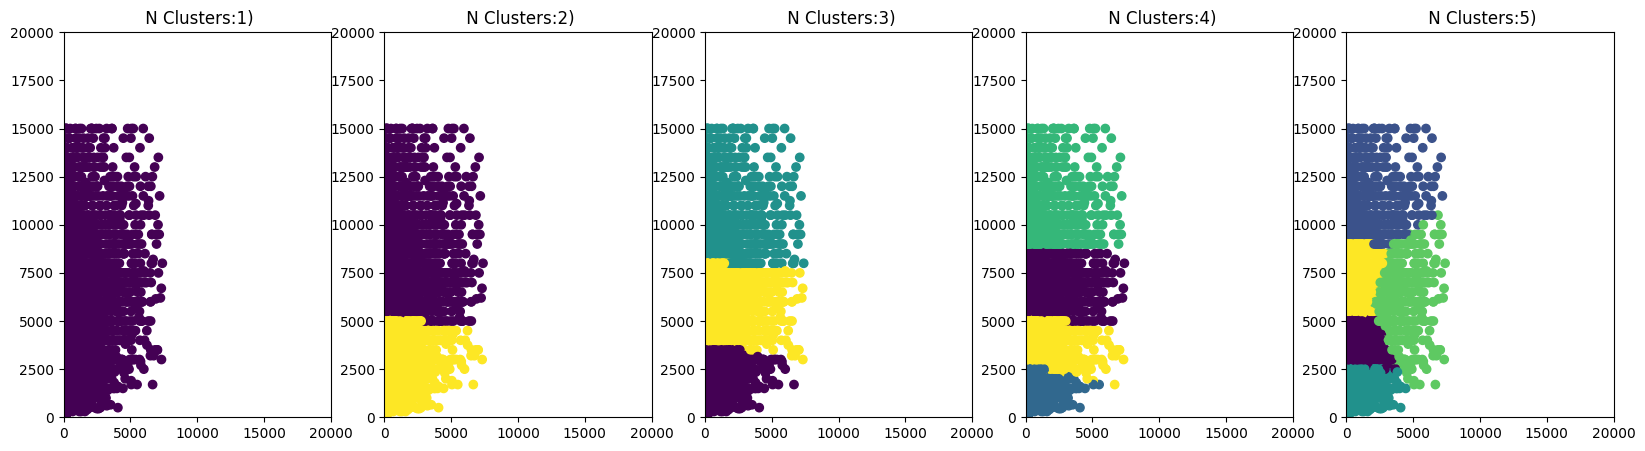

In [21]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

# Iterate directly over the axs array
for i, ax in enumerate(axs, start=1):
    ax.scatter(x=df_filtered['PURCHASES'], y=df_filtered['CREDIT_LIMIT'], c=df_filtered[f'kmeans_{i}'])
    ax.set_ylim(0, 20000)
    ax.set_xlim(-1, 20000)
    ax.set_title(f' N Clusters:{i})')

plt.show()

# **FINDING THE BEST K USING ELBOW METHOD**

In [22]:
# Finding the best k value
def optimise_k_kmeans(data, max_k):
  means = []
  inertias = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)
 #Generate the elbow plot
  fig = plt.subplots(figsize=(10, 5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Inertia')
  plt.title('Elbow Method for Optimal k')
  plt.grid(True)
  plt.show()

In [23]:
import warnings
warnings.filterwarnings('ignore')

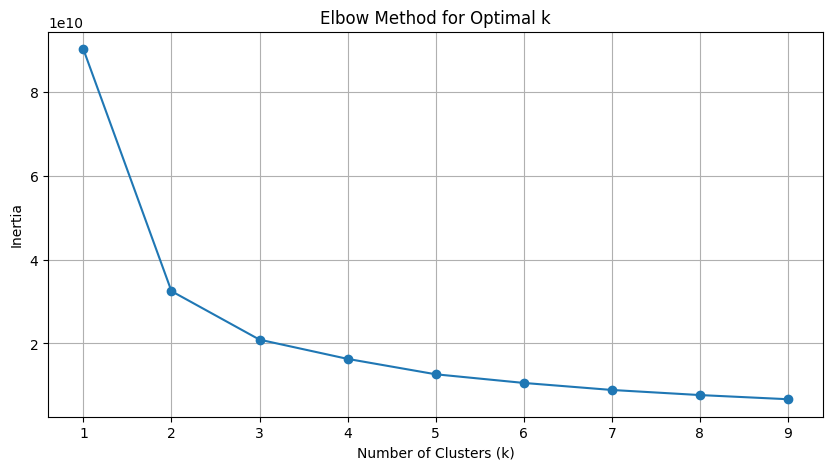

In [24]:
optimise_k_kmeans(df_filtered[['PURCHASES', 'CREDIT_LIMIT']], 10)

# **interpreting the result**

In [ ]:
#Interpret the results
"""
the data set is being grouped into 3 clusters based on the purchases and credit limit.

Cluster 1 (Purple): Customers in this cluster generally have low credit limits and make lower purchases.
Cluster 2 (Teal): These customers have moderate credit limits and varying purchase amounts. They seem to be an intermediate group between low and high credit limit customers.
Cluster 3 (Yellow): This cluster consists of customers with high credit limits and a wide range of purchase behaviors.
"""
